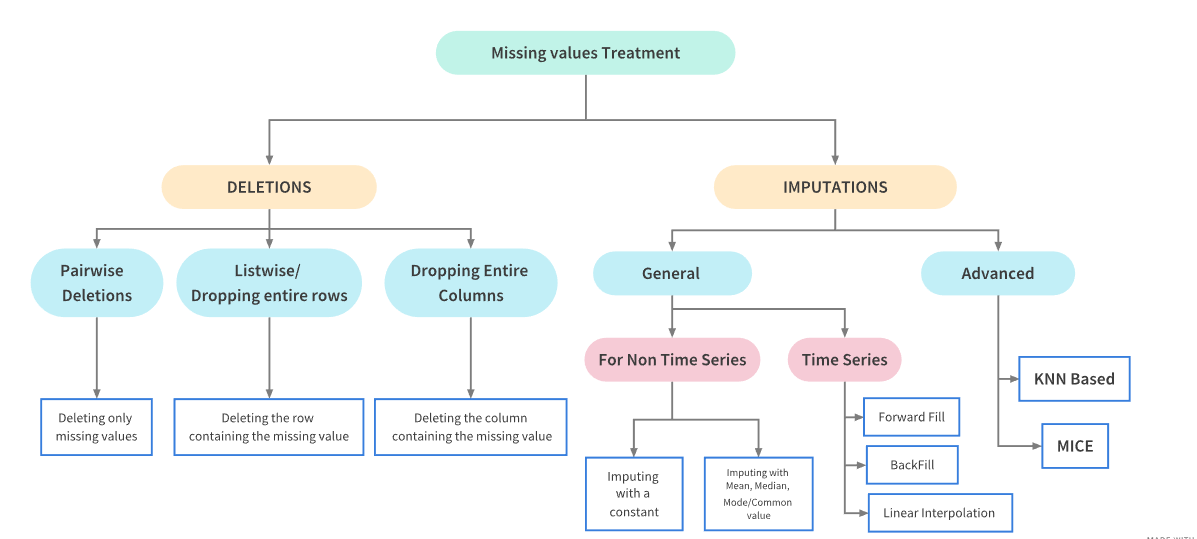

Real world data is messy and often contains a lot of missing values. There could be multiple reasons for the missing values but primarily the reason for missingness can be attributed to

Reason for missing Data
Data doesn't exist
Data not collected due to human error.
Data deleted accidently
Either way we need to address this issue before we proceed with the modeling stuff. It is also important to note that some algorithms like XGBoost and LightGBM can treat missing data without any preprocessing.

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 0.  2.  3.]
 [ 4.  0.  6.]
 [10.  0.  9.]]


In [7]:
!pip install missingno

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
import missingno as msno

In [9]:
import os

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
print('train shape:',train.shape)
print('test shape:',test.shape)

train shape: (891, 12)
test shape: (418, 11)


In [12]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [14]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


la cai gi day: <Axes.ArtistList of 2 patches>


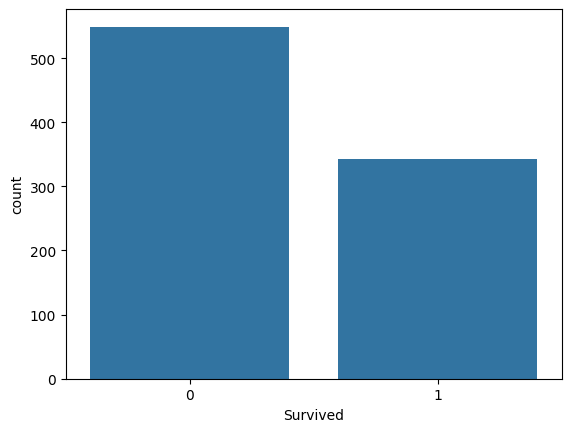

In [15]:
s = sns.countplot(x = 'Survived',data = train)
print('la cai gi day:',s.patches)
size = []

In [16]:
for p in s.patches:
  print(p)
  print(p.get_height())
  print(p.get_x())
  print(p.get_width(),'\n')


Rectangle(xy=(-0.4, 0), width=0.8, height=549, angle=0)
549.0
-0.4
0.8 

Rectangle(xy=(0.6, 0), width=0.8, height=342, angle=0)
342.0
0.6
0.7999999999999999 



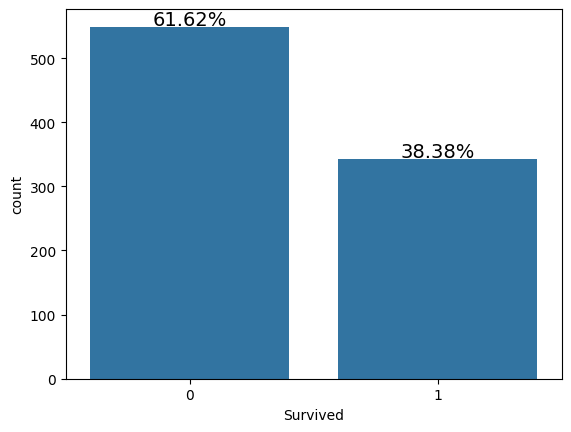

In [17]:
s = sns.countplot(x = 'Survived',data = train)
for p in s.patches:
  height = p.get_height()
  size.append(height)
  s.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14)


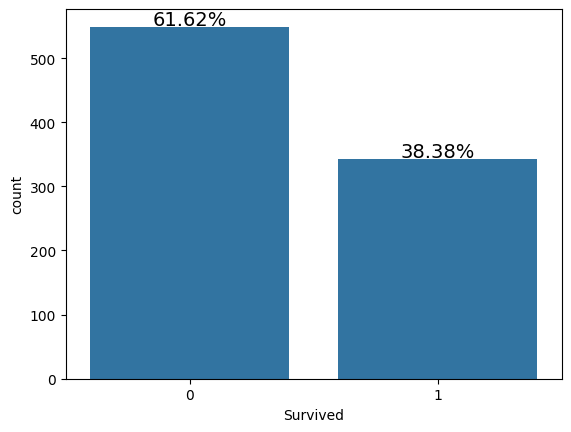

In [18]:
s = sns.countplot(x = 'Survived', data = train)
hung = []
for p in s.patches:
  height = p.get_height()
  hung.append(height)
  s.text(p.get_x()+p.get_width()/2,height + 3,'{:1.2f}%'.format(height/len(train)*100),ha = 'center',fontsize = 14)

detecting a missing value numerically

In [19]:
def missing_values_table(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum()/len(df)
  mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
   # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [20]:
train_missing = missing_values_table(train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [21]:
test_missing = missing_values_table(test)
test_missing

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


<Axes: >

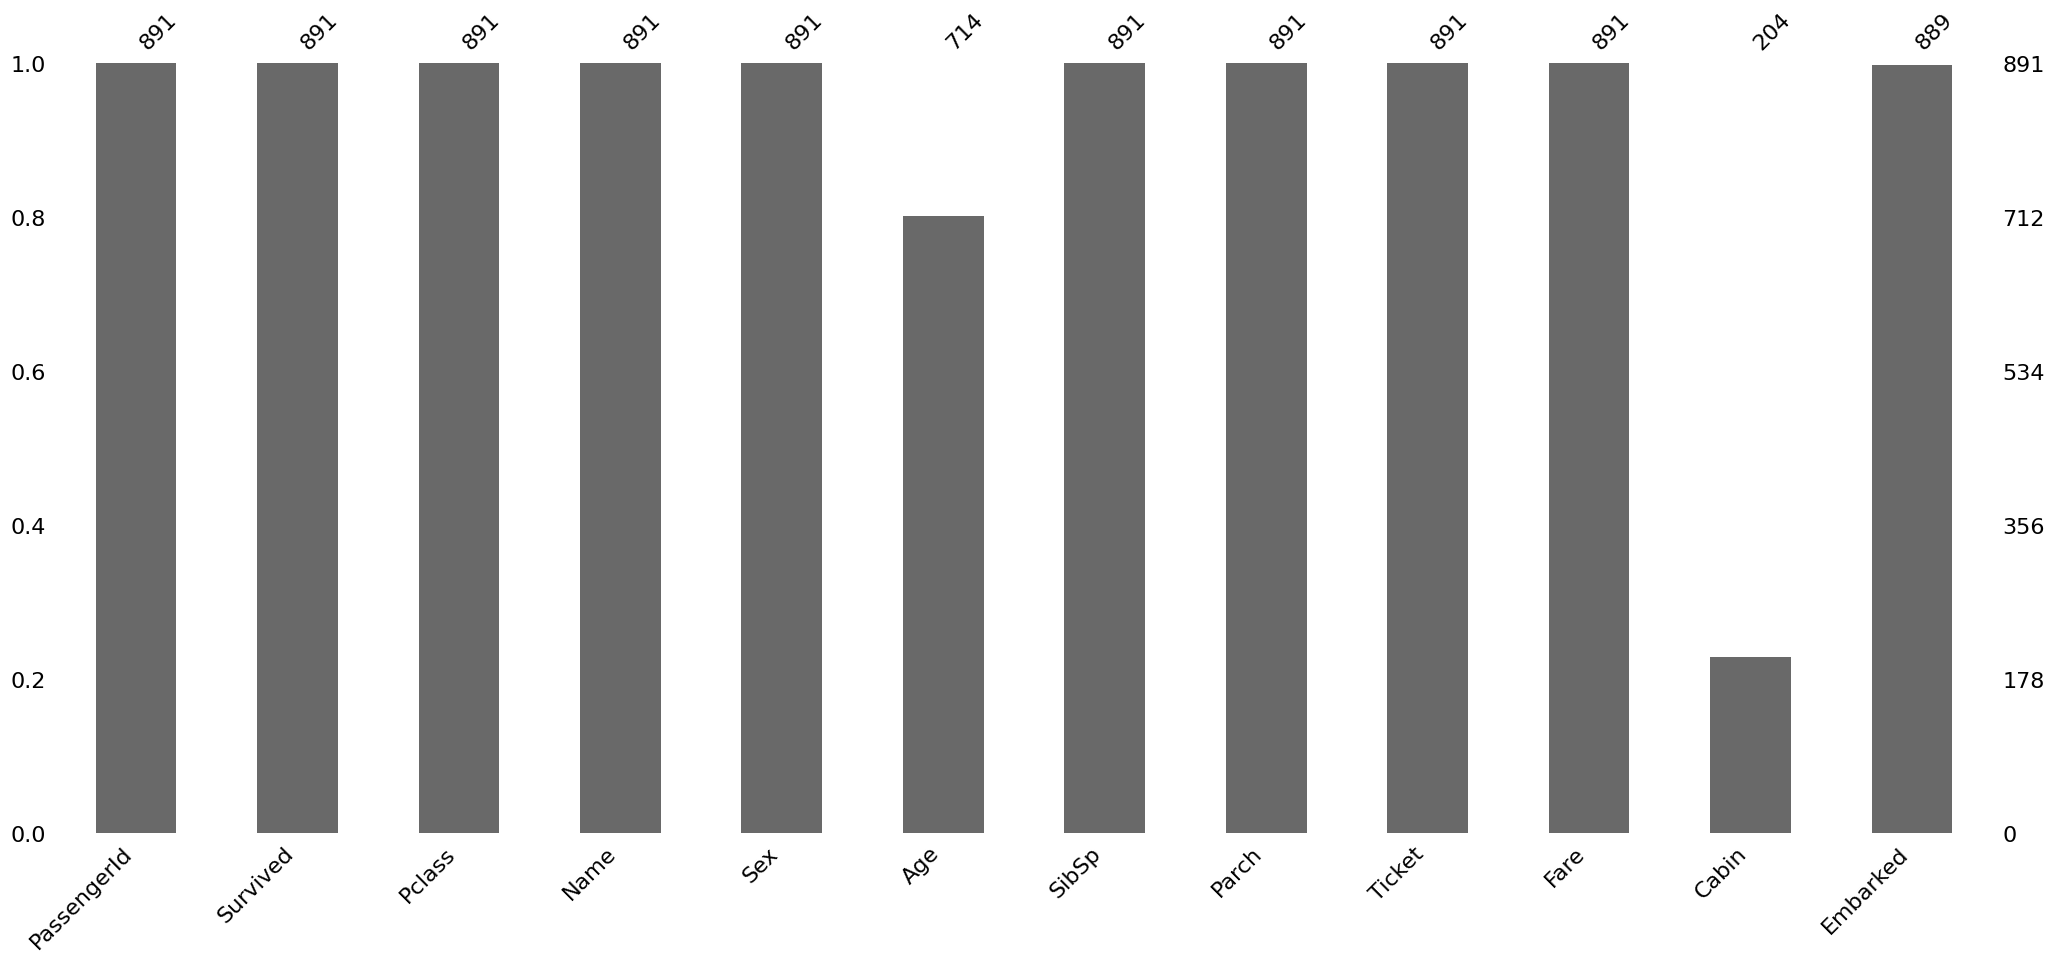

In [22]:
msno.bar(train)

<Axes: >

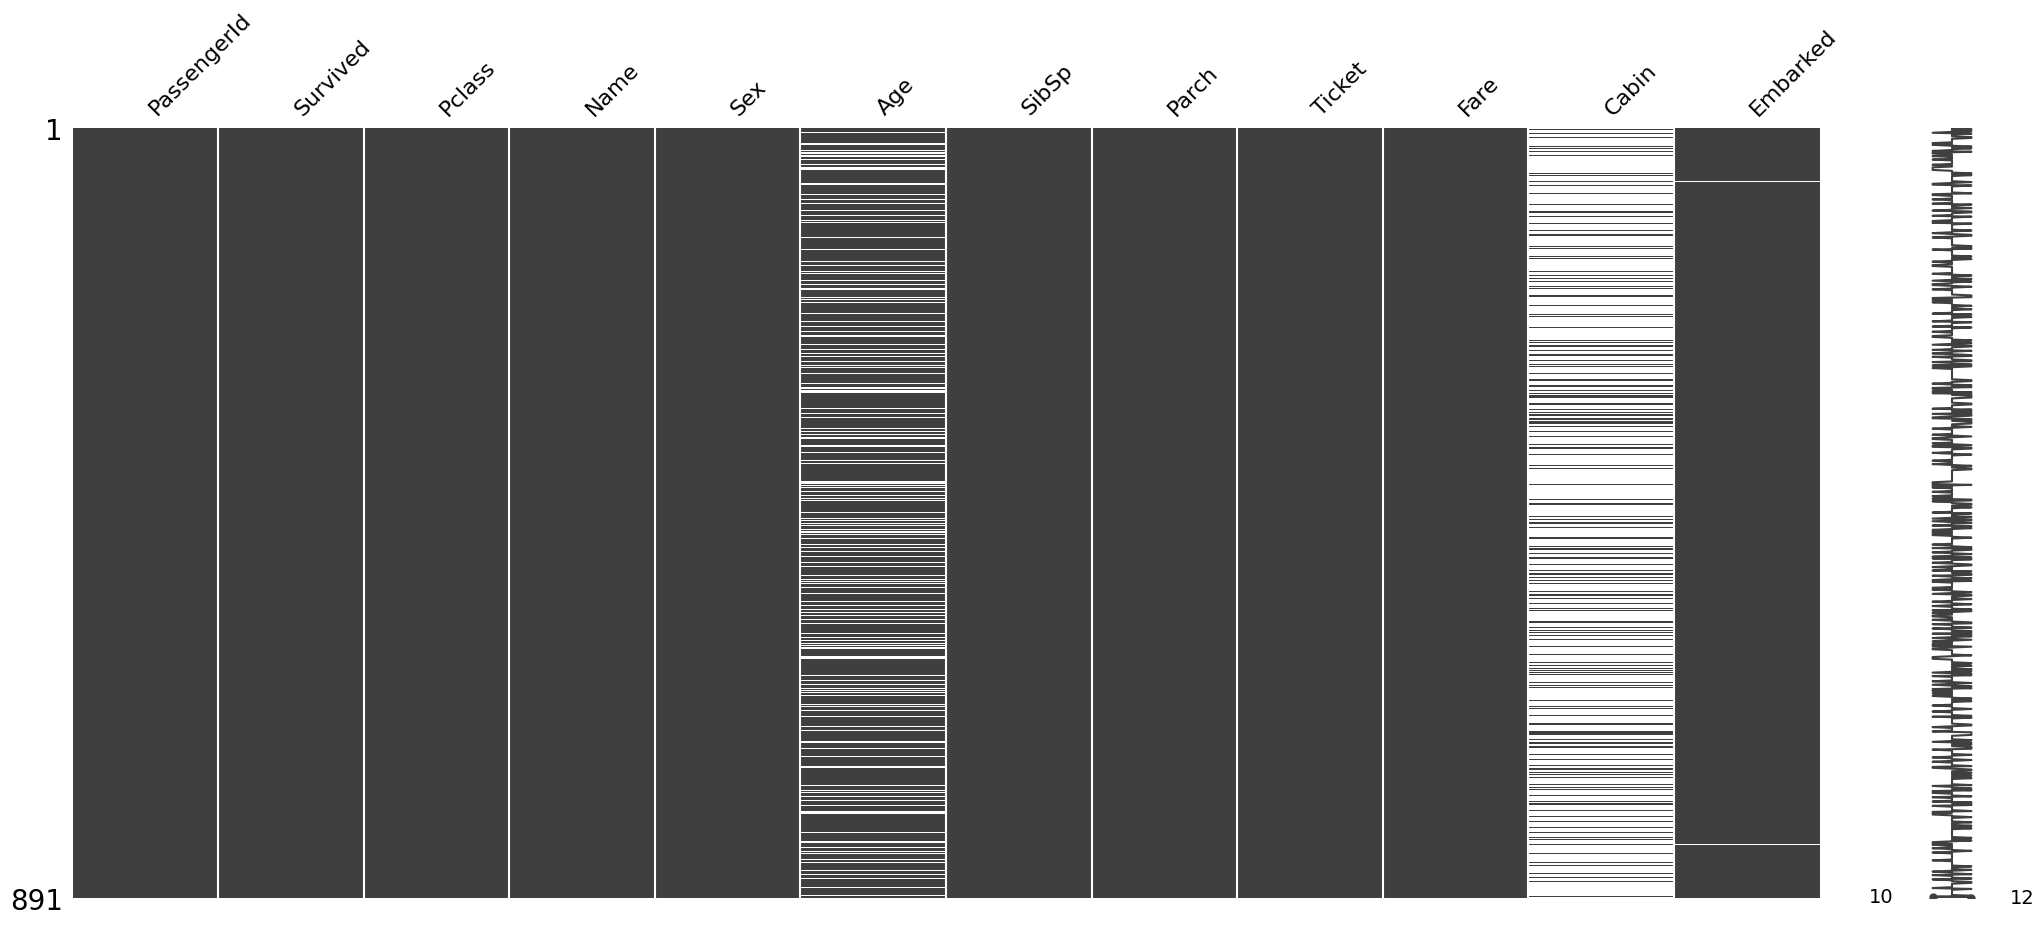

In [23]:
msno.matrix(train)

Reasons for Missing Values
Before we start treating the missing values ,it is important to understand the various reasons for the missingness in data. Broadly speaking, there can be three possible reasons:



source:https://cjasn.asnjournals.org/content/early/2014/02/06/CJN.10141013/tab-figures-data?versioned=true

1. Missing Completely at Random (MCAR)

The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

2. Missing at Random (MAR)

MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

3. Missing Not at Random (MNAR)

Missingness depends on unobserved data or the value of the missing data itself.

All definitions taken from Wikipedia: https://en.wikipedia.org/wiki/Missing_data

Now let us look at nullity matrix again to see if can find what type of missingness is present in the dataset.

<Axes: >

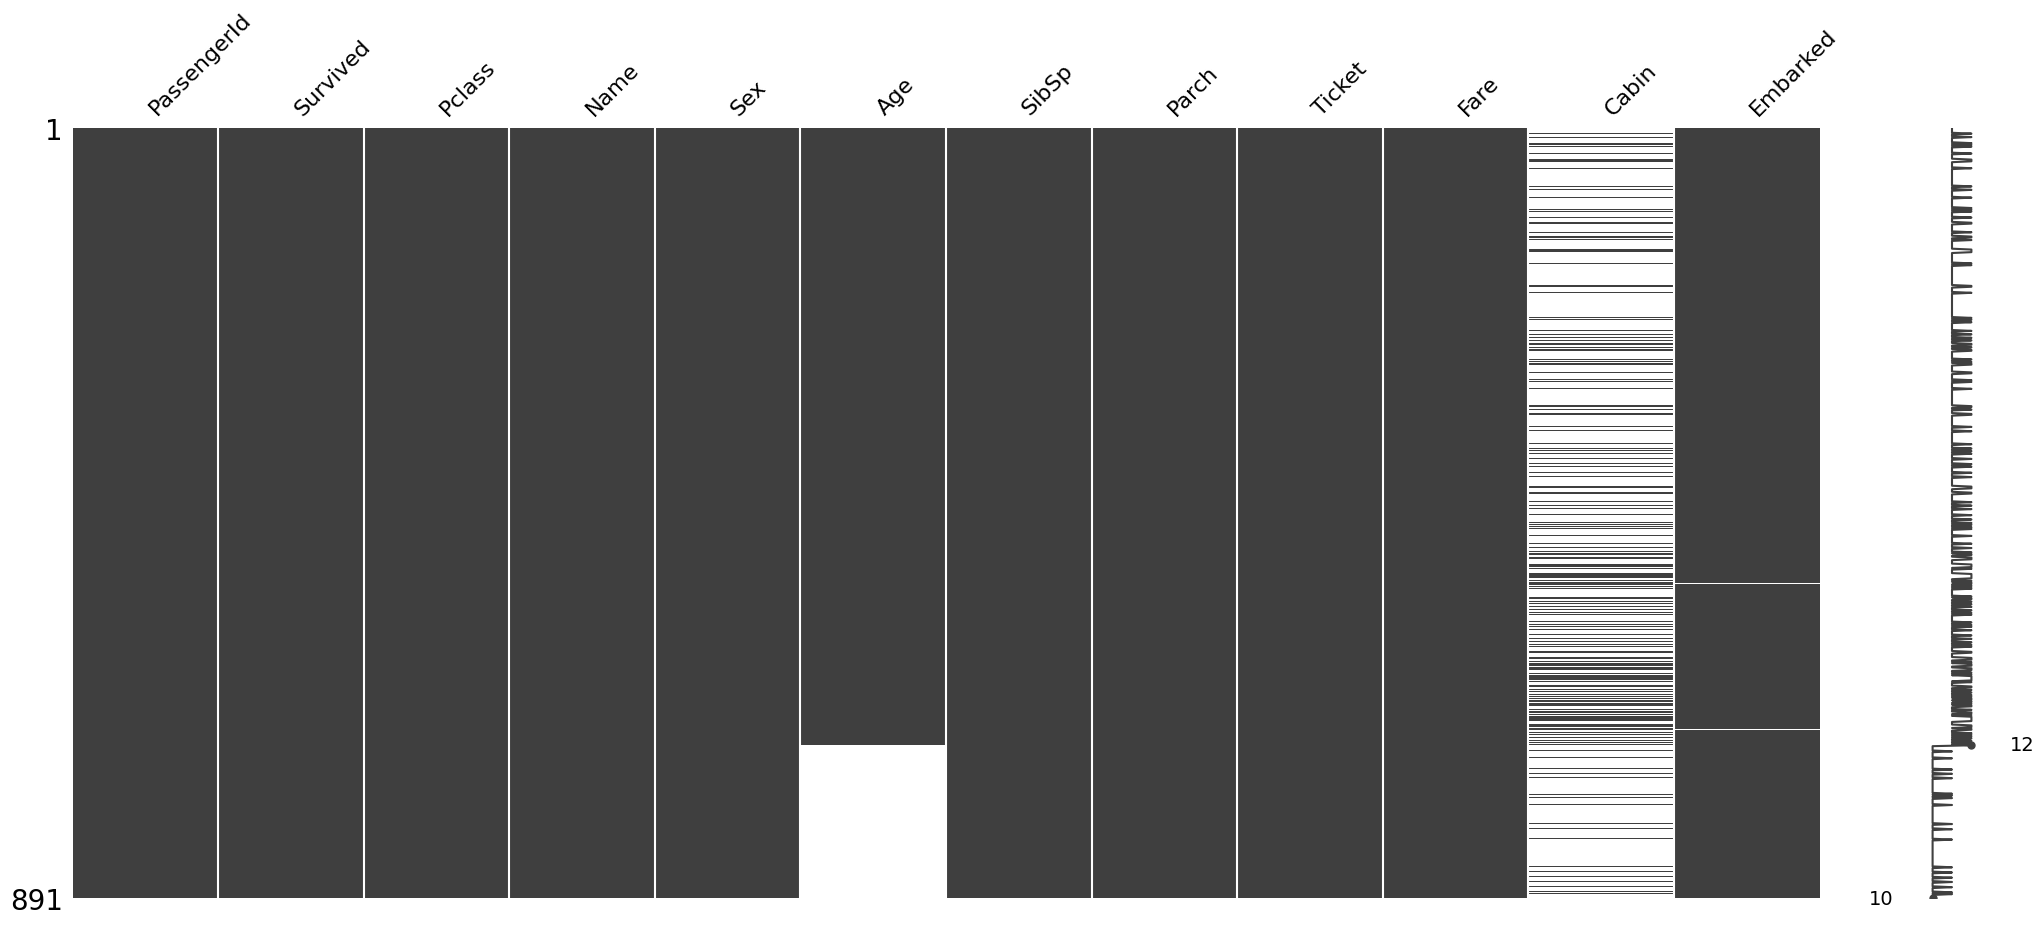

In [24]:
sorted = train.sort_values('Age')
msno.matrix(sorted)

Finding reason for missing data using a Heatmap

<Axes: >

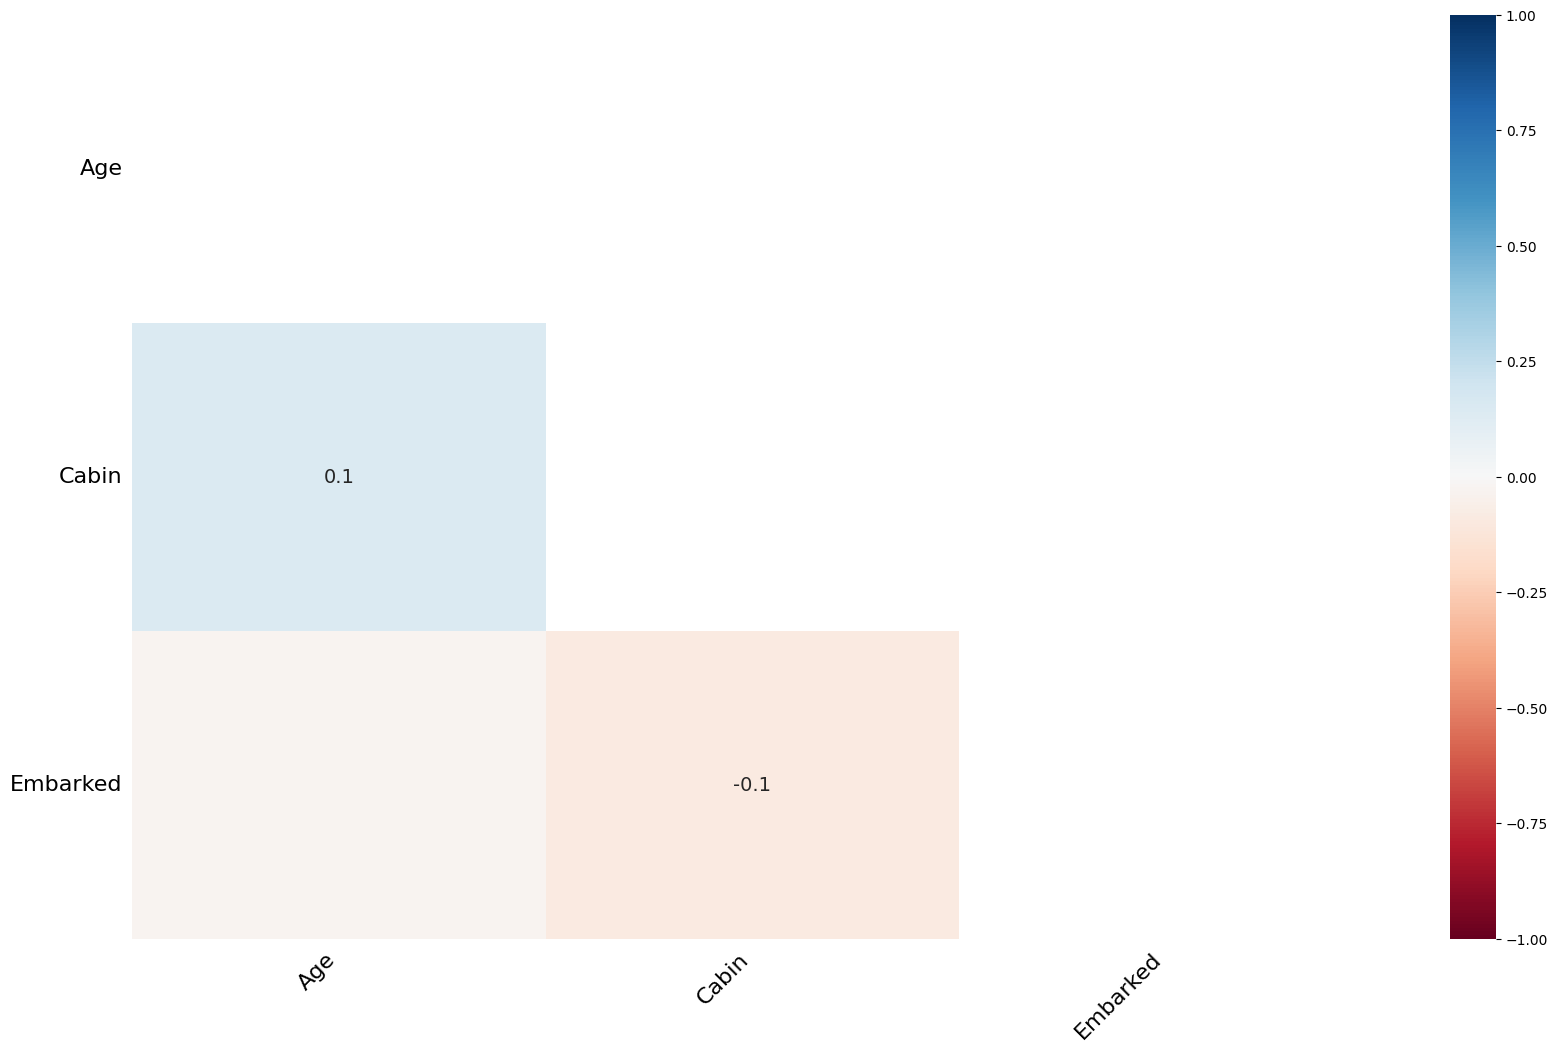

In [25]:
msno.heatmap(train)

The heatmap function shows that there are no strong correlations between missing values of different features. This is good; low correlations further indicate that the data are MAR.

Finding reason for missing data using Dendrogram¶


A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.

<Axes: >

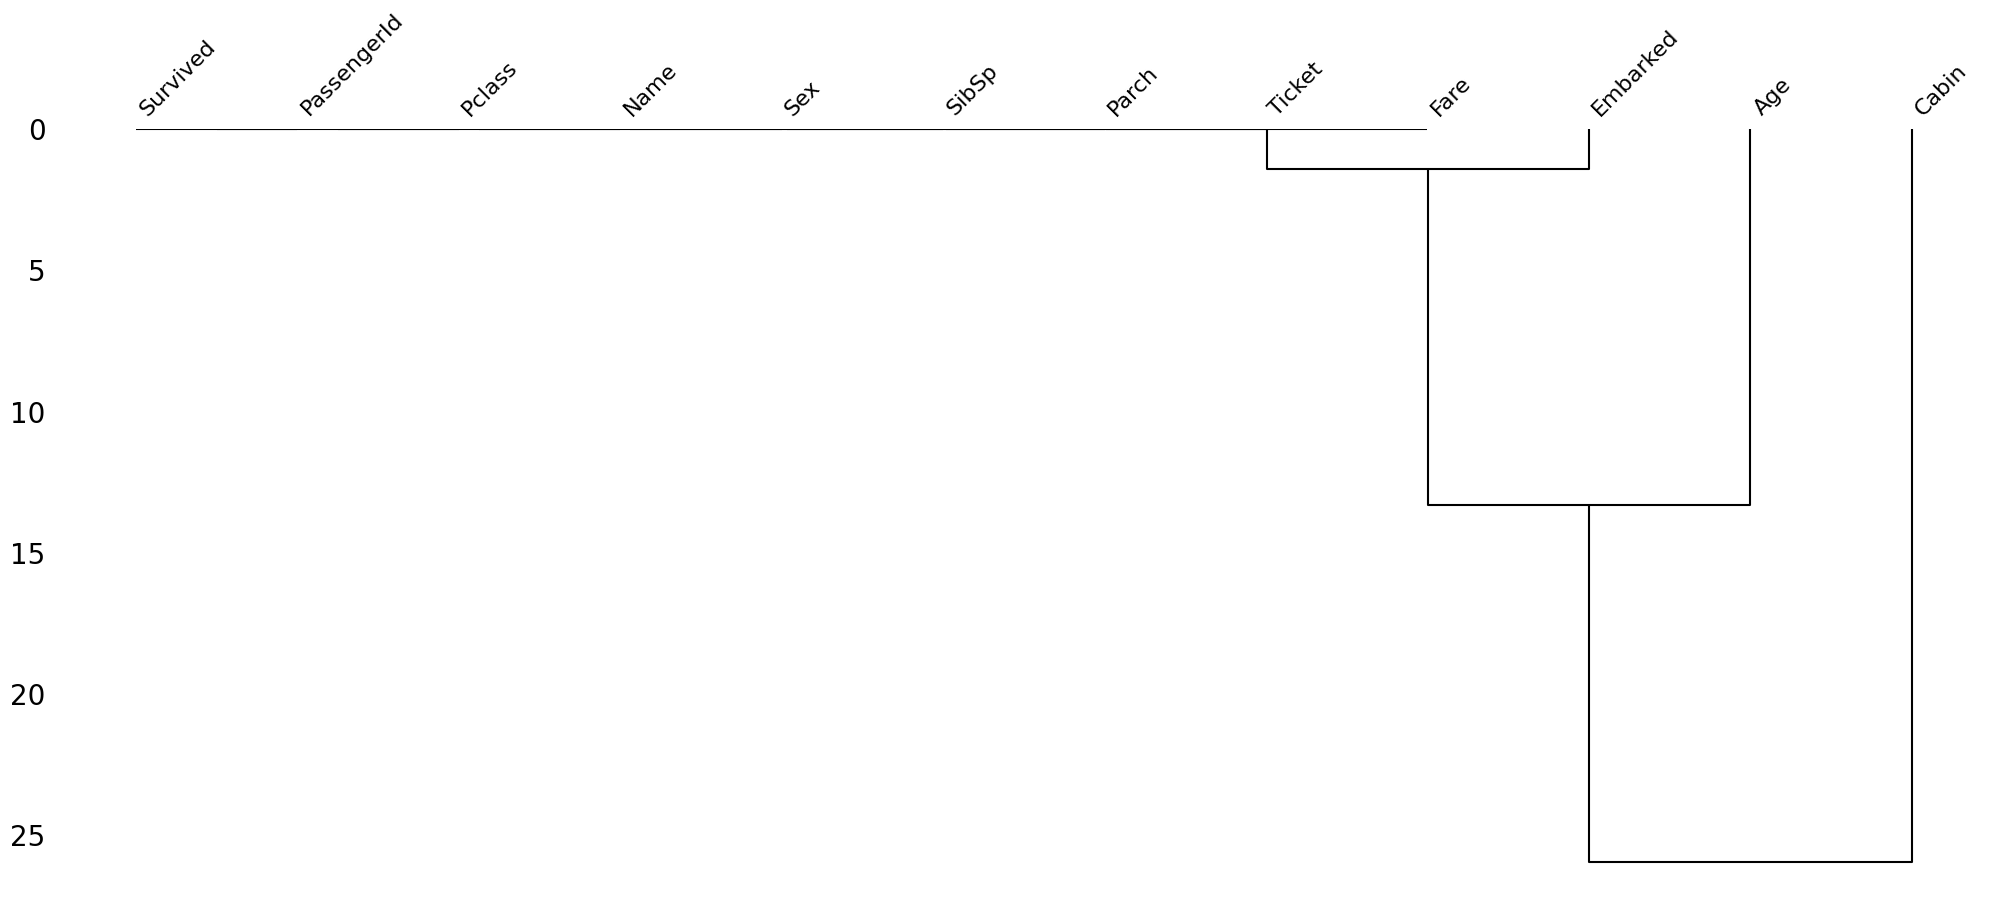

In [26]:
msno.dendrogram(train)

Treating Missing values¶


Pairwise Deletion
Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

In [27]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
train_1 = train.copy()
train_1['Age'].mean() #pandas skips the missing values and calculates mean of the remaining values.

29.69911764705882

Listwise Deletion/ Dropping rows
During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

In [29]:
#Drop rows which contains any NaN or missing value for Age column
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()

0

In [30]:
train_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The Age column doesn't have any missing values.A major diadvantage of Listwise deletion is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

Dropping complete columns
If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [35]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy = 'constant')
train_hung = train.copy()
train_hung.iloc[:,:] = imp_mean.fit_transform(train_hung)
train_hung.isnull().sum()

<ipython-input-35-a584ef463b3f>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[22.0, 38.0, 26.0, 35.0, 35.0, 'missing_value', 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, 'missing_value', 31.0, 'missing_value', 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, 'missing_value', 19.0, 'missing_value', 'missing_value', 40.0, 'missing_value', 'missing_value', 66.0, 28.0, 42.0, 'missing_value', 21.0, 18.0, 14.0, 40.0, 27.0, 'missing_value', 3.0, 19.0, 'missing_value', 'missing_value', 'missing_value', 'missing_value', 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, 'missing_value', 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, 'missing_value', 'missing_value', 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, 'missing_value', 'missing_value', 0.83, 30.0, 22.0, 29.0, 'missing_value', 28.0, 17.0, 33.0, 16.0, 'missing_value', 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, 'missing_value', 71.0, 23.0, 34.0, 34.0, 28.0, 'missi

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [36]:
from sklearn.impute import SimpleImputer
ngu = SimpleImputer(strategy = 'most_frequent')
train_ngu = train.copy()
train_ngu.iloc[:,:] = ngu.fit_transform(train_ngu)
train_ngu.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")

print("Path to dataset files:", path)

100%|██████████| 72.9M/72.9M [00:00<00:00, 98.1MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rohanrao/air-quality-data-in-india/versions/12


Imputations Techniques for Time Series Problems
Now let's look at ways to impute data in a typical time series problem. Tackling missing values in time Series problem is a bit different. The fillna() method is used for imputing missing values in such problems.

Basic Imputation Techniques
'ffill' or 'pad' - Replace NaN s with last observed value
'bfill' or 'backfill' - Replace NaN s with next observed value
Linear interpolation method
Time Series dataset
The dataset is called Air Quality Data in India (2015 - 2020) Tand it contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.The dataset has a lot of missing values and and is a classic Time series problem.

In [38]:
city_day = pd.read_csv('city_day.csv',parse_dates=True,index_col='Date')
city_day1 = city_day.copy(deep = True)
city_day1

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [39]:
city_day_missingvalues = missing_values_table(city_day)
city_day_missingvalues

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


In [40]:
city_day['Xylene'][50:64]

,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,NaN
2015-02-27,NaN
2015-02-28,NaN


In [41]:
city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][50:65]

<ipython-input-41-80466fa4ca55>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day.fillna(method='ffill',inplace=True)


,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,0.81
2015-02-27,0.81
2015-02-28,0.81


In [42]:
city_day['AQI'][20:30]

,AQI
Date,
2015-01-21,NaN
2015-01-22,NaN
2015-01-23,NaN
2015-01-24,NaN
2015-01-25,NaN
2015-01-26,NaN
2015-01-27,NaN
2015-01-28,NaN
2015-01-29,209.0


In [43]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]

<ipython-input-43-69f643dfe860>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day.fillna(method='bfill',inplace=True)


,AQI
Date,
2015-01-21,209.0
2015-01-22,209.0
2015-01-23,209.0
2015-01-24,209.0
2015-01-25,209.0
2015-01-26,209.0
2015-01-27,209.0
2015-01-28,209.0
2015-01-29,209.0


Imputation using Linear Interpolation method¶
Time series data has a lot of variations against time. Hence, imputing using backfill and forward fill isn't the ebst possible solution to address the missing value problem. A more apt alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

Refer to the official documentation for a complete list of interpolation strategies here


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

INTERPOLATION CALCULATION MADE EZ
Julia Zhang, GlaxoSmithKline, Collegeville PA
David Chen, EDP Contract Services, Bala Cynwyd PA

In [44]:
city_day1['Xylene'][50:65]

,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,NaN
2015-02-27,NaN
2015-02-28,NaN


In [45]:
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:65]

<ipython-input-45-8740fd366178>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  city_day1.interpolate(limit_direction="both",inplace=True)


,Xylene
Date,
2015-02-20,7.4800
2015-02-21,15.4400
2015-02-22,8.4700
2015-02-23,28.4600
2015-02-24,6.0500
2015-02-25,0.8100
2015-02-26,0.9375
2015-02-27,1.0650
2015-02-28,1.1925


Advanced Imputation Techniques¶

Advanced imputation techniques uses machine learning algorithms to impute the missing values in a dataset unlike the previous techniques where we used other column values to predict the missing values. We shall look at the following two techniques in this notebook:

Nearest neighbors imputation

Multivariate feature imputation

K-Nearest Neighbor Imputation

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation

https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation

https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation

In [47]:
train_knn = train.copy(deep=True)

In [48]:
from sklearn.impute import KNNImputer
train_knn = train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [50]:
train_knn['Age'].isnull().sum()

0

Multivariate feature imputation - Multivariate imputation by chained equations (MICE)

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value. In sklearn, it is implemented as follows:

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])

In [52]:
train_mice['Age'].isnull().sum()

0

Algorithms which handle missing values

Some algprithms like XGBoost and LightGBM can handle missing values without any preprocessing, by supplying relevant parameters.

XGBoost

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

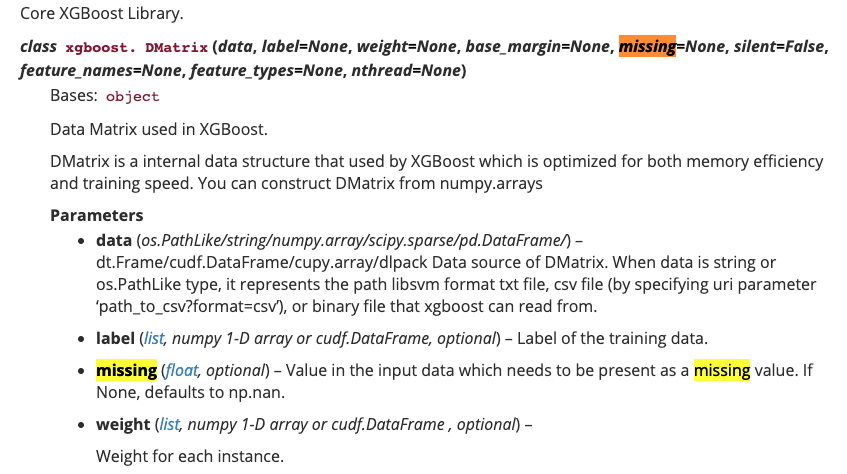

LightGBm

https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html

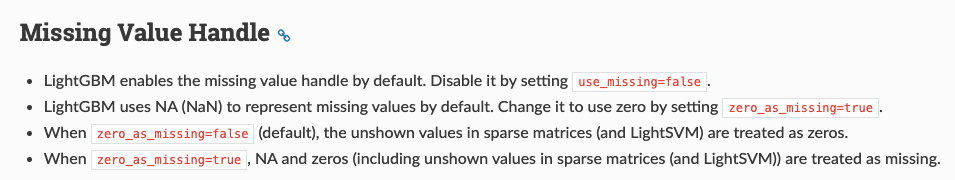